In [57]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

train_data = pd.read_csv('machine_learning/kaggle_data/titanic_train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


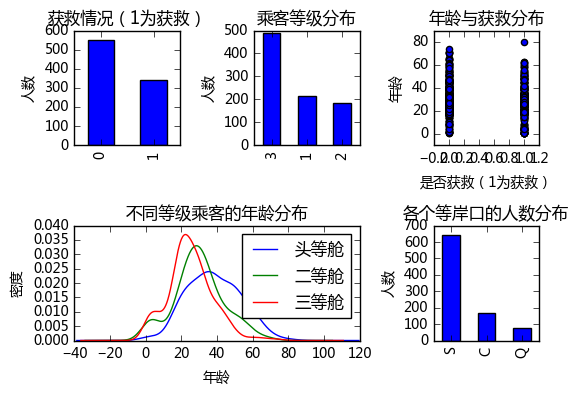

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)
plt.subplots_adjust(wspace=0.7, hspace=0.7)

plt.subplot2grid((2, 3), (0, 0))
train_data.Survived.value_counts().plot(kind='bar')
plt.title('获救情况（1为获救）')
plt.ylabel('人数')

plt.subplot2grid((2, 3), (0, 1))
train_data.Pclass.value_counts().plot(kind='bar')
plt.title('乘客等级分布')
plt.ylabel('人数')

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(train_data.Survived, train_data.Age)
plt.title('年龄与获救分布')
plt.ylabel('年龄')
plt.xlabel('是否获救（1为获救）')

plt.subplot2grid((2, 3), (1, 0), colspan=2)
train_data.Age[train_data.Pclass == 1].plot(kind='kde')
train_data.Age[train_data.Pclass == 2].plot(kind='kde')
train_data.Age[train_data.Pclass == 3].plot(kind='kde')
plt.title('不同等级乘客的年龄分布')
plt.xlabel('年龄')
plt.ylabel('密度')
plt.legend(('头等舱', '二等舱', '三等舱'), loc='best')

plt.subplot2grid((2, 3), (1, 2))
train_data.Embarked.value_counts().plot(kind='bar')
plt.title('各个等岸口的人数分布')
plt.ylabel('人数')
plt.show()

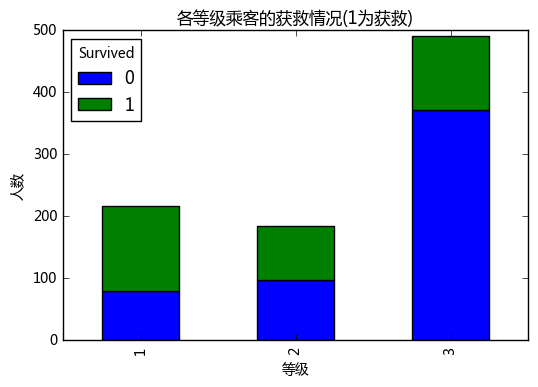

In [13]:
#查看各等级乘客的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

pd.crosstab(train_data.Pclass, train_data.Survived).plot(kind='bar', stacked=True)
plt.title('各等级乘客的获救情况(1为获救)')
plt.xlabel('等级')
plt.ylabel('人数')
plt.show()

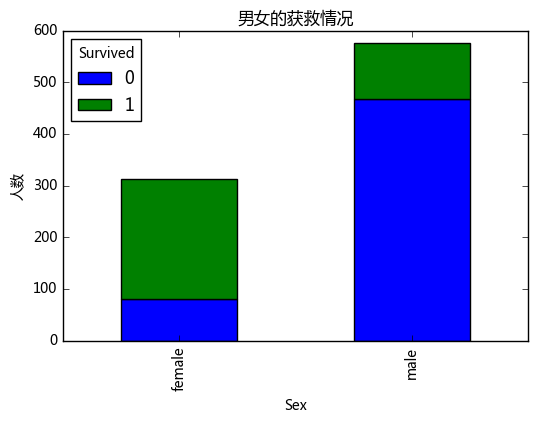

In [14]:
#查看男女的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

pd.crosstab(train_data.Sex, train_data.Survived).plot(kind='bar', stacked=True)
plt.title('男女的获救情况')
plt.ylabel('人数')
plt.show()

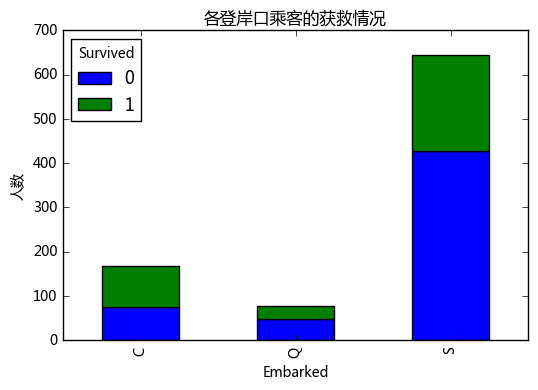

In [16]:
#查看各登岸口乘客的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

pd.crosstab(train_data.Embarked, train_data.Survived).plot(kind='bar', stacked=True)
plt.title('各登岸口乘客的获救情况')
plt.ylabel('人数')
plt.show()

In [21]:
df = train_data.groupby(['SibSp', 'Survived'])['PassengerId'].count()
print(df)
df = train_data.groupby(['Parch', 'Survived'])['PassengerId'].count()
print(df)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64
Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64


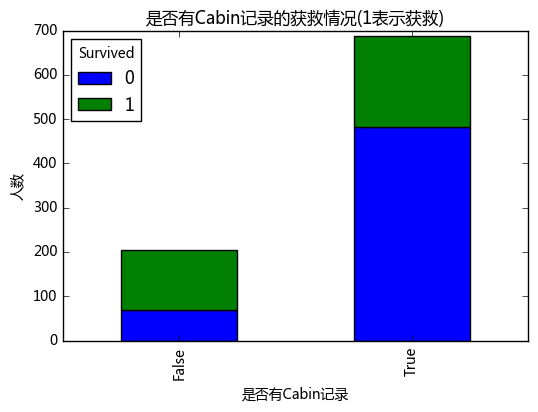

In [26]:
fig  = plt.figure()
fig.set(alpha=0.2)

pd.crosstab(train_data.Cabin.isnull(), train_data.Survived).plot(kind='bar', stacked=True)
plt.title('是否有Cabin记录的获救情况(1表示获救)')
plt.ylabel('人数')
plt.xlabel('是否有Cabin记录')
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor
train_data = pd.read_csv('machine_learning/kaggle_data/titanic_train.csv')

def set_missing_age(df):
    #使用RandomForestRegressor根据Fare Parch SibSp Pclass来拟合年龄
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    know_age = age_df[age_df.Age.notnull()].as_matrix()
    unknow_age = age_df[age_df.Age.isnull()].as_matrix()
    y = know_age[:, 0]
    X = know_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predicted_ages = rfr.predict(unknow_age[:, 1::])
    df.loc[df.Age.isnull(), 'Age'] = predicted_ages
    return df, rfr
def set_carbin(df):
    df.loc[df.Cabin.notnull(), 'Cabin'] = 'Yes'
    df.loc[df.Cabin.isnull(), 'Cabin'] = 'No'
    return df

train_data.info()
train_data, rfr = set_missing_age(train_data)
train_data = set_carbin(train_data)
print(train_data.Cabin.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
No     687
Yes    204
Name: Cabin, dtype: int64


In [68]:
cabin_dummies = pd.get_dummies(train_data.Cabin, prefix='Cabin')
sex_dummies = pd.get_dummies(train_data.Sex, prefix='Sex')
embark_dummies = pd.get_dummies(train_data.Embarked, prefix='Embarked')
pclass_dummies = pd.get_dummies(train_data.Pclass, prefix='Pclass')
df = pd.concat([train_data, cabin_dummies, sex_dummies, embark_dummies, pclass_dummies], axis=1)
df.drop(['Cabin', 'Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,1,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,1,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,0,1,0,0,1,0,0,1
5,6,0,"Moran, Mr. James",23.828953,0,0,330877,8.4583,1,0,0,1,0,1,0,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,0,1,0,1,0,0,1,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,1,0,0,1,0,0,1,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,1,0,1,0,0,0,1,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,1,0,1,0,1,0,0,0,1,0


In [70]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df.head()

c:\python35\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\python35\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\python35\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_No,Cabin_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,0,1,0,0,1,-0.561363,-0.502445
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,1,0,1,0,0,1,0,0,0.613182,0.786845
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,0,0,0,1,0,0,1,-0.267727,-0.488854
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,1,0,0,0,1,1,0,0,0.392955,0.420730
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1,0,0,1,0,0,1,0.392955,-0.486337


In [74]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()
y = train_np[:, 0]
X = train_np[:, 1:]
lr = linear_model.LogisticRegression(C=1.0, penalty='l1', tol = 1e-6)
lr.fit(X, y)

lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [82]:
test_data = pd.read_csv('machine_learning/kaggle_data/titanic_test.csv')
test_data.info()

test_data.loc[test_data.Fare.isnull(), 'Fare'] = 0

test_df_for_age_predict = test_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = test_df_for_age_predict[test_df_for_age_predict.Age.isnull()].as_matrix()
y = null_age[:, 0]
X = null_age[:, 1:]
predicted_ages = rfr.predict(X)
test_data.loc[test_data.Age.isnull(), 'Age'] = predicted_ages

test_data = set_carbin(test_data)

cabin_dummies = pd.get_dummies(test_data['Cabin'], prefix='Cabin')
embark_dummies = pd.get_dummies(test_data['Embarked'], prefix='Embarked')
sex_dummies = pd.get_dummies(test_data['Sex'], prefix='Sex')
pclass_dummies = pd.get_dummies(test_data['Pclass'], prefix='Pclass')

test_df = pd.concat([test_data, cabin_dummies, embark_dummies, sex_dummies, pclass_dummies], axis=1)
test_df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_df['Age_scaled'] = scaler.fit_transform(test_df['Age'], age_scale_param)
test_df['Fare_scaled'] = scaler.fit_transform(test_df['Fare'], fare_scale_param)
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


c:\python35\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\python35\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\python35\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307535,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256230,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394665,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261683,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641161,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248326,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.033996,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337578,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944743,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717056,-0.204154


In [84]:
test = test_df.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = lr.predict(test)
result = pd.DataFrame({'PassengerId':test_data['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("machine_learning/kaggle_data/logistic_regression_predictions.csv", index=False)